In [13]:
import cv2
import numpy as np
import sys
import torch
from src.fusionModel.nn.segment import SegmentPostProcessing
torch.set_float32_matmul_precision('medium')

In [14]:
import cv2
import torch
import cv2
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


# Open the image using PIL
image1 = Image.open('/home/anirudhan/project/ZMFF/data/datasets/Rifle/01.jpg')
image2 = Image.open('/home/anirudhan/project/ZMFF/data/datasets/Rifle/10.jpg')
# Define the transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformations to the image
image1 = transform(image1).unsqueeze(0)
image2 = transform(image2).unsqueeze(0)

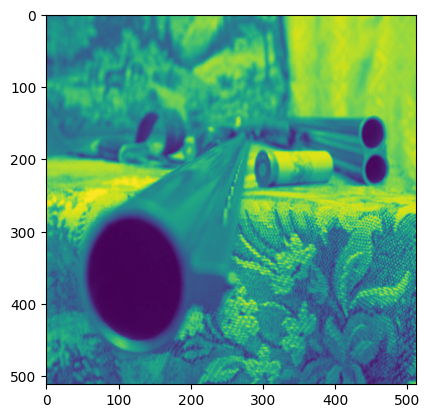

In [15]:
plt.imshow(image2[0,0].cpu().numpy())

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SegmentPostProcessing().to(device)
model.load_state_dict(torch.load('/home/anirudhan/project/image-fusion/results/checkpoints_postprocess/model_10.pth')['model_state_dict'])

<All keys matched successfully>

In [17]:
model = model.eval()
output = model(image1.to(device)/255, image2.to(device)/255)
output = torch.nn.functional.softmax(output, dim=1)

In [18]:
output = output.squeeze().detach().cpu().permute(1, 2, 0).numpy()

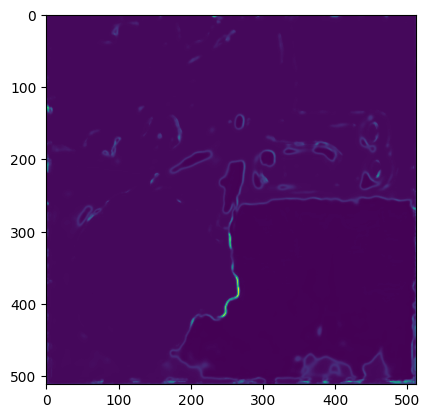

In [20]:
plt.imshow(output[:,:,1])